# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [ ]:
env = UnityEnvironment(file_name='./Reacher20.app')

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Initialise agent

In [5]:
STATE_SIZE = 33
ACTION_SIZE = 4
SEED = 17

import torch
from agent import Agent
from collections import deque

agent = Agent(STATE_SIZE, ACTION_SIZE, SEED, actor_lr=.001, critic_lr=.001)

### 4. (a) Restore agent 

If you would prefer to load a saved model use the following cell with the appropriate model name. In case you'd like to train your agent skip to step 4b.

In [ ]:
agent.load_state('13022019-1')

### 4. (b) Train the agent

In [6]:
def ddpg(num_episodes, timesteps_per_episode, goal_score=30, learn_every=20, num_learn=10):
    total_mean_scores_per_episode = []
    total_mean_scores_deque = deque(maxlen=100)
    
    for episode_idx in range(num_episodes):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        episode_scores = np.zeros(num_agents)
        
        for timestep in range(timesteps_per_episode):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            episode_scores += rewards
            agent.step(zip(states, actions, rewards, next_states, dones))
            states = next_states
            
            if timestep % learn_every == 0:
                for _ in range(num_learn):
                    agent.learn()
    
            if np.any(dones):
                break
                
        
        episode_mean_score = np.mean(episode_scores)
        episode_min_score = np.min(episode_scores)
        episode_max_score = np.max(episode_scores)
        total_mean_scores_deque.append(episode_mean_score)
        total_mean_scores_per_episode.append(episode_mean_score)
        total_average_score = np.mean(total_mean_scores_deque)
        print('\rEpisode {}\tTotal Average Score: {:.2f}\tMean: {:.2f}\tMin: {:.2f}\tMax: {:.2f}'
              .format(episode_idx, total_average_score, episode_mean_score, episode_min_score, episode_max_score))
        
        if np.mean(total_mean_scores_deque) > goal_score and episode_idx > 100:
            break
            
    return total_mean_scores_per_episode

In [7]:
scores = ddpg(1000, 1000)

Episode 0	Total Average Score: 0.40	Mean: 0.40	Min: 0.02	Max: 1.49
Episode 1	Total Average Score: 0.51	Mean: 0.62	Min: 0.00	Max: 1.98
Episode 2	Total Average Score: 0.63	Mean: 0.88	Min: 0.00	Max: 2.36
Episode 3	Total Average Score: 0.75	Mean: 1.11	Min: 0.33	Max: 2.06
Episode 4	Total Average Score: 0.81	Mean: 1.05	Min: 0.18	Max: 2.16
Episode 5	Total Average Score: 1.00	Mean: 1.93	Min: 0.52	Max: 3.07
Episode 6	Total Average Score: 1.07	Mean: 1.52	Min: 0.41	Max: 3.40
Episode 7	Total Average Score: 1.27	Mean: 2.66	Min: 0.99	Max: 6.32
Episode 8	Total Average Score: 1.46	Mean: 3.00	Min: 1.06	Max: 6.00
Episode 9	Total Average Score: 1.77	Mean: 4.51	Min: 1.33	Max: 7.92
Episode 10	Total Average Score: 2.09	Mean: 5.31	Min: 2.04	Max: 10.56
Episode 11	Total Average Score: 2.41	Mean: 5.94	Min: 2.10	Max: 13.10
Episode 12	Total Average Score: 2.98	Mean: 9.76	Min: 3.93	Max: 20.60
Episode 13	Total Average Score: 3.73	Mean: 13.49	Min: 3.61	Max: 27.04
Episode 14	Total Average Score: 4.75	Mean: 19.08	Min:

### 5. Persist agent weights (optional)

Execute the following cell in order to persist weights. These weights can then be used to initialize the agent. Make sure you update `MODEL_NAME`.

In [ ]:
agent.save_state('MODEL_NAME')

### 6. View performance of our agent

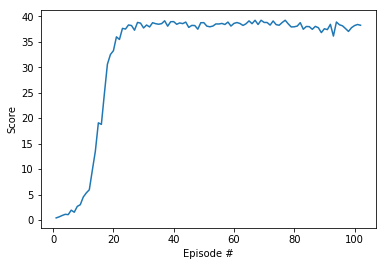

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 7. Watch trained agent

In [13]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)

while True:
    actions = agent.act(states)                        # select actions from loaded model agent
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score: {}'.format(np.mean(scores)))

Total score: 38.17299914676696


In [ ]:
env.close()